#                                          DSC 495 : Final Project

### **Topic: K-Means Clustering**
----------------------------------------------------------------------------------------------------------------------                          

#### TERMS TO KNOW : 
1. *Unsupervised Machine Learning algorithm*: This is a category of of algorithms used in machine learning whose prime purpose is to "Identify patterns in a data set that contains data points that are not classified or labelled".

2. *Cluster*: It is a collection of data points that are grouped together because of certain similarities.

3. *Cluster point*: It is a certain data point in a given data set(that is being analyzed) around which a Cluster is formed.
 
 

## Description:

K-means clustering is an unsupervided machine learning algorithm. The algorithm goes as follows:

**Step 1**: Identify the number of clusters you want to seperate your given data points into. This number will be your K value. Although there are specific ways to choose your K value, for the sake of simplicity of this project, I will choose my K-values using an educated guess.

**Step 2**: Find K number of points(randomly chosen) in your data set. These will be called as your "Initial clusters".

**Step 3**: Measure the distance between each data point in your data set(using distance formula) and the K initial cluster points. 

**Step 4**: Assign each data point to its nearest Initial cluster point.

**Step 5**: Calculate the mean of each cluster. Now repeat steps 3-4 where you are clustering data points around each mean value(take these mean values as your new cluster points).

**Step 6**: Now, we measure the variance within each cluster and add these values to get the total variance for the given data set.

#### *Remarks*:
- To identify the best clustering for a given K-value, we have to repeat steps 1-6 for different initial cluster points(for the same K value), and find the clustering that produces the lowest value for total variance.
- To identify the best overall clustering, we have to repeat steps 1-6 for different initial K-values and different initial clusters, compare the total variance for these different initial cluster points and K-values, and find out the clustering that produces the lowest total variance.


## Methodology:

In this section, I will be outlining the approach that I will be using to implement the K-means algorithm.

**PART (i)**: Importing the necessary following libraries: 
1. Numpy : Used for fast computations. For example: I will be using Numpy to compute which cluster any random data point from a given data set will belong to.
2. Matplotlib : I will be using this library to create scatter plots of my data set, which will help me in making an educated guess for my K-value.
3. Scikit-learn : Used for importing IRIS species Dataset.
**PART (ii)**: Implementing Steps 1-6: 
*Note: For all steps, assume that the class 'Kmeans' has been created*
1. To implement STEP 1: 
- Import IRIS dataset
- Create a scatterplot of the Datapoints. Make an educated guess for the K-value.
2. To implement STEP 2:
- Use numpy.random.choice on the an array that contain numbers from 0-(Total sample size) to get random indices.
- Initialize Kcentroids to be equal to the datapoint at each of these indices of the given Dataset
3. To implement STEP 3:
- Create a function called xy_dist(a,b) that calculates the distance between any two vectors a,b.
- Create another function called create_cluster inside the class 'Kmeans' that will assign each Datapoint to the initial centroids(in other words, initial cluster points)
- Create another function called closest_centroid that calculates the distance between a point and all the centroids by calling the xy_dist(a,b) function. Call the function closest_centroid from create_cluster.
4. To implement STEP 4:
- See the methodology for step 3
5. To implement STEP 5:
- Create a function called new_centroids that assigns the mean value of each cluster during each iteration of the K-means algorithm to 'Kcentroids'.
- The functions create_cluster, and closest_centroid are called each time the K-means algorithm goes through an iteration.
6. To implement STEP 6: Instead of measuring total variance, I have created a function called '_converged_' that checks if each the centroid have settled at one value(one for each centroid).

*Note: I have implemented some more functions that I've explained through my comments. Please read through them for reference.*


## Implementation and Results:
#### 1. K-means CLASS:

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
%matplotlib inline


def xy_dist(a,b):
    return np.sqrt(np.sum((a-b)**2))

class Kmeans:
    def __init__(self, K=3,max_iterations = 150, plot_steps = False):
        self.K = K
        self.max_iterations = max_iterations ##Number of iterations to find out the optimal centroids
        self.plot_steps = plot_steps ##We will use this attribute to plot each stage of the K means clustering(until convergence of centroids)
        
        ##Create K empty lists inside another list.
        ## Each list out of the K lists will store the index of the ndarray X that gives us the respective datapoint in the respective cluster.
        self.clusters = [[] for i in range(self.K)] 
        
        self.Kcentroids = [] ##Stores the values of K centroids
    def predict_model(self, X):
        self.X = X
        
        self.no_of_samples = X.shape[0]
        self.no_of_features = X.shape[1]
        self.no_of_attributes = X.shape
        ##This attribute tells us the total number of rows and columns in X. This will be used later to get random indices 
        ##of X that will allow us to make random initial choices for centroid values
        
        ##Create a 1-d array with values 0 to (Number of samples - 1)
        self.indices_array = np.arange(0,self.no_of_samples,1)
        
        ##Find random indices of X that will give us the random intial centroid values
        random_centroid_indices = np.random.choice(self.indices_array,self.K, replace= False)
        self.Kcentroids = X[random_centroid_indices]
        
        ##Using a for loop, we will keep updating the centroids, and the clusters.
        ##After the for loop ends, we will check if the centroids have converged.
        
        for i in range(self.max_iterations):
            ##Update clusters
            self.clusters = self._create_cluster(self.Kcentroids)
            
            if self.plot_steps:
                self.plot2()
                
            ##Update centroids
            old_centroids = self.Kcentroids ##Store the old centroids to check for convergence later
            self.Kcentroids = self._new_centroids(self.clusters)
            
            if self.plot_steps:
                self.plot2()
                
            ##Check if the centroids have converged
            if self._converged(old_centroids,self.Kcentroids):
                break
        ##Return the cluster label for each Datapoint as a list
        return self._cluster_labels(self.clusters)
    
    ##Finds the cluster label for each Datapoint by traversing through the 'clusters' list
    def _cluster_labels(self, clusters):
        labels = np.zeros(self.no_of_samples)
        for cluster_index, indexes_of_points in enumerate(clusters):
            for i in indexes_of_points:
                labels[i] = cluster_index ##Labels each data point with its appropriate cluster index
        return labels
        
    ##Create a helper function that appends each index of X(or in other words, Datapoints in X) to its appropriate cluster based
    ##on its distance from each centroid
    def _create_cluster(self, Kcentroids):
        clusters = [[] for i in range(self.K)]
        for index, sample in enumerate(self.X):
            assigned_centroid = self._closest_centroid(sample, Kcentroids) ##Finds the centroid index to which you want to assign the sample to
            clusters[assigned_centroid].append(index)
        return clusters
    
    ##Create a helper function that will find the index of the closest centroid for each sample
    def _closest_centroid(self, sample, Kcentroids):
        distances = [] ##List that will store the distance between the sample and each of the K centroids
        for i in range(self.K):
            distances.append(xy_dist(sample,Kcentroids[i]))
        closest_centroid = np.argmin(distances) ##Finds the index of the closest centroid
        return closest_centroid
    
    ##Create a function that will calculate the mean vlue of each cluster and store it as the new Centroids
    def _new_centroids(self, clusters):
        Kcentroids = np.zeros((self.K,self.no_of_features)) ##Initialize all centroids to be (0,0)
        for cluster_index, index_of_points in enumerate(clusters):
            X_values = []
            for i in index_of_points:
                X_values.append(self.X[i])
            cluster_mean = np.mean(X_values,axis = 0) ##Finds the mean value of each cluster as 2-tuple
            Kcentroids[cluster_index] = cluster_mean
        return Kcentroids
        
    ##Create a function that will calculate the distances between the old and new centroids to check for convergence
    def _converged(self,old_centroids,Kcentroids):
        distance = []
        sum = 0
        for i in range(self.K):
            distance.append(xy_dist(old_centroids[i],Kcentroids[i]))
        for i in range(self.K):
            sum +=distance[i]
        if sum==0:
            return True
        else:
            return False
        
    ##Plot my results
    def plot1(self):
        fig, ax = plt.subplots(figsize=(12,8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T ##plot each point on a scatter plot
            ax.scatter(*point)
            
        for point in self.Kcentroids:
            ax.scatter(*point,marker = "x", color = "black", linewidth=2)
        ax.set_title('Final K-means Clustering Plot', fontsize = 18)
        ax.set_ylabel('Sepal Width', fontsize = 16)
        ax.set_xlabel('Sepal Length', fontsize = 16)
    
    def plot2(self):
        fig, ax = plt.subplots(figsize=(12,8))
        for i, index in enumerate(self.clusters):
            point = self.X[index].T ##plot each point on a scatter plot
            ax.scatter(*point)
            
        for point in self.Kcentroids:
            ax.scatter(*point,marker = "x", color = "black", linewidth=2)
        ax.set_title('Step-By-Step K-means Clustering Plot', fontsize = 18)
        ax.set_ylabel('Sepal Width', fontsize = 16)
        ax.set_xlabel('Sepal Length', fontsize = 16)
        

#### 2. Final Clustering plot results of implementing the K-means algorithm on the IRIS Species Dataset:

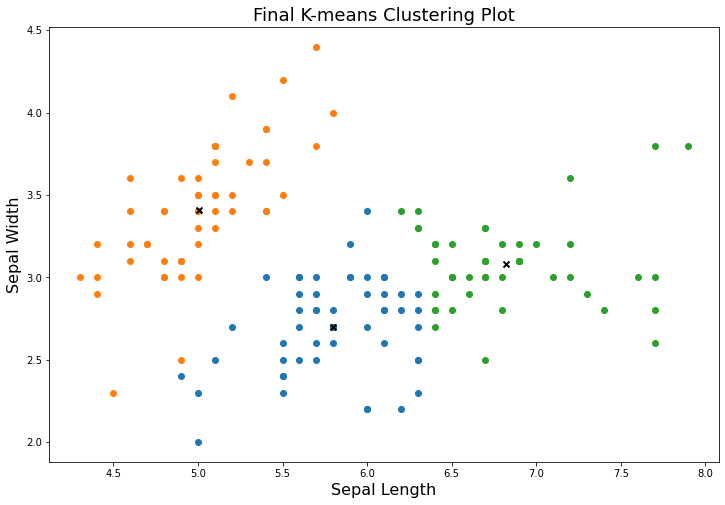

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
%matplotlib inline

iris = datasets.load_iris()
X = iris.data[:,:2]

k = Kmeans(K = 3, max_iterations=150, plot_steps = False)
predicted_clusters = k.predict_model(X)

k.plot1()

#### 3. Step-by Step Clustering plot results of implementing the K-means algorithm on the IRIS Species Dataset:

/var/folders/3z/0886jy4j2nv4lydymg5vwltc0000gn/T/ipykernel_85119/2673100511.py:123: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(12,8))


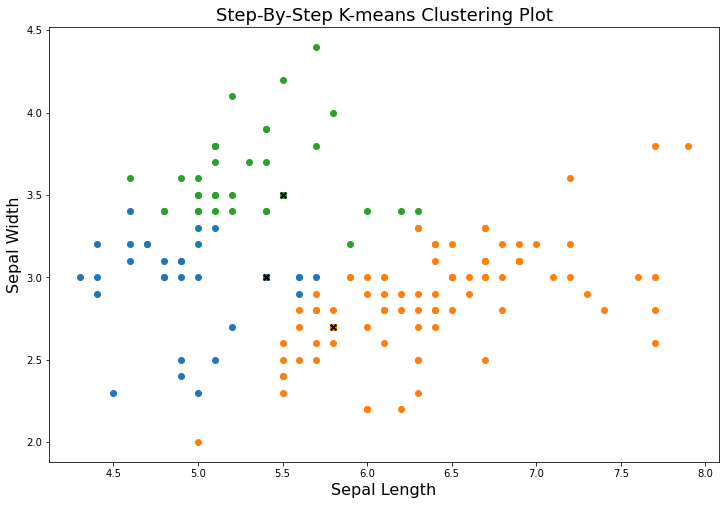

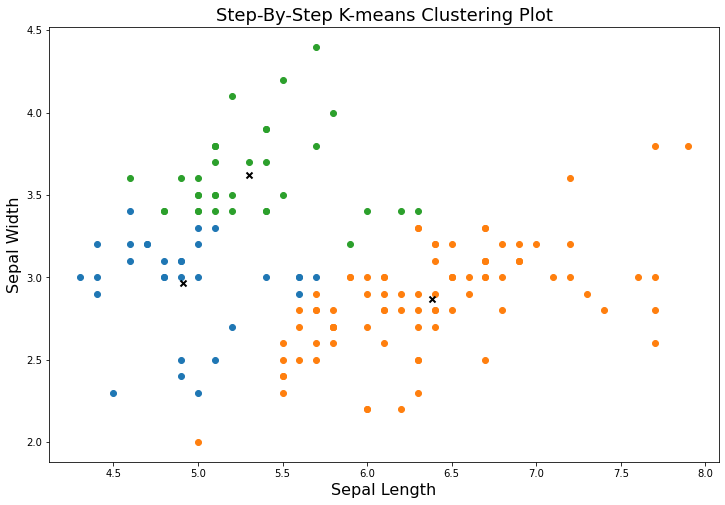

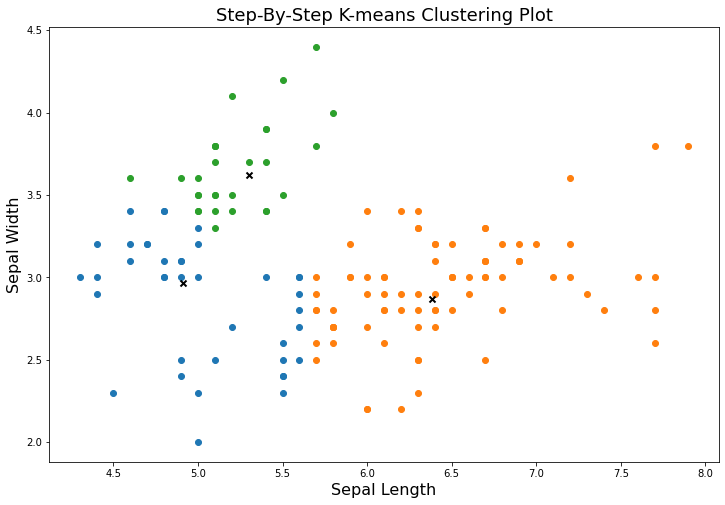

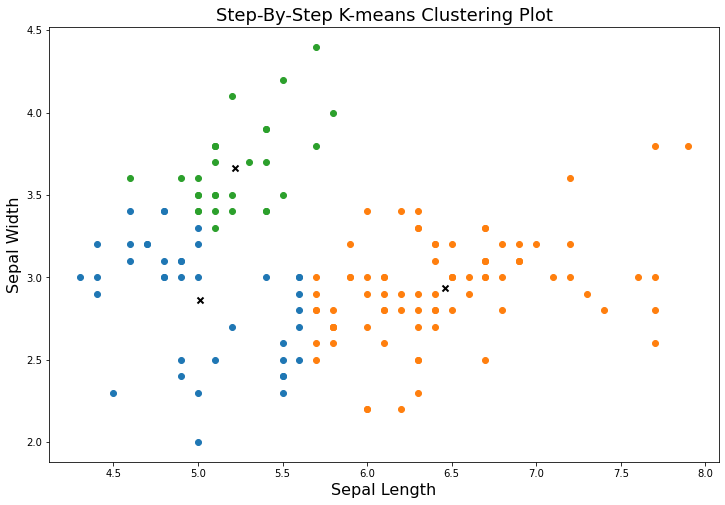

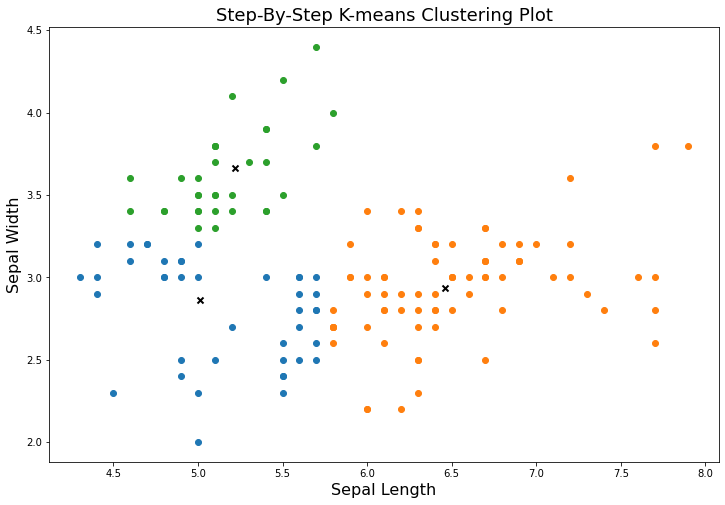

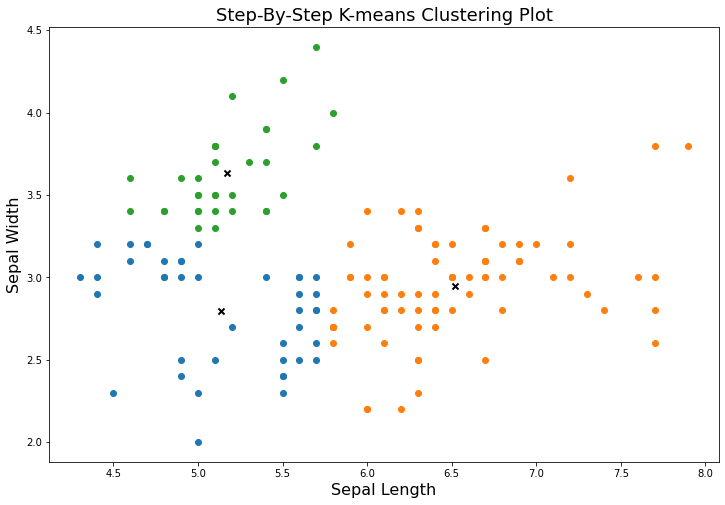

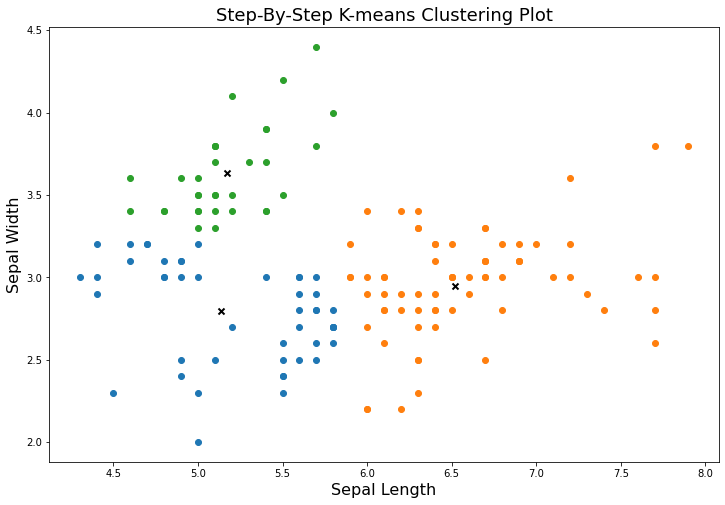

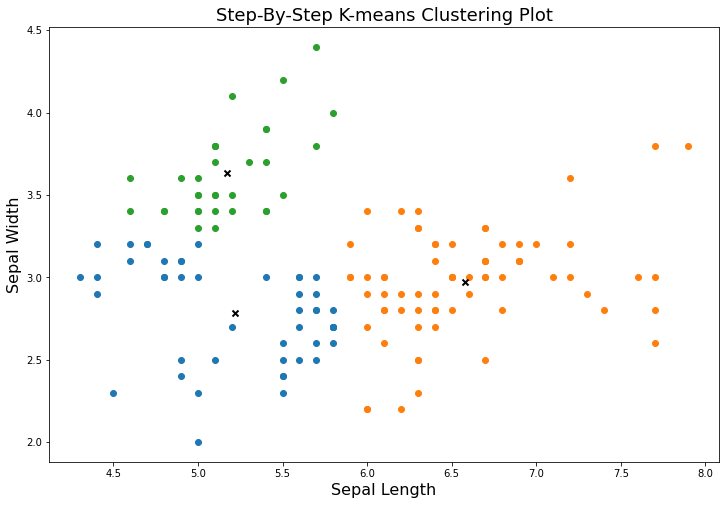

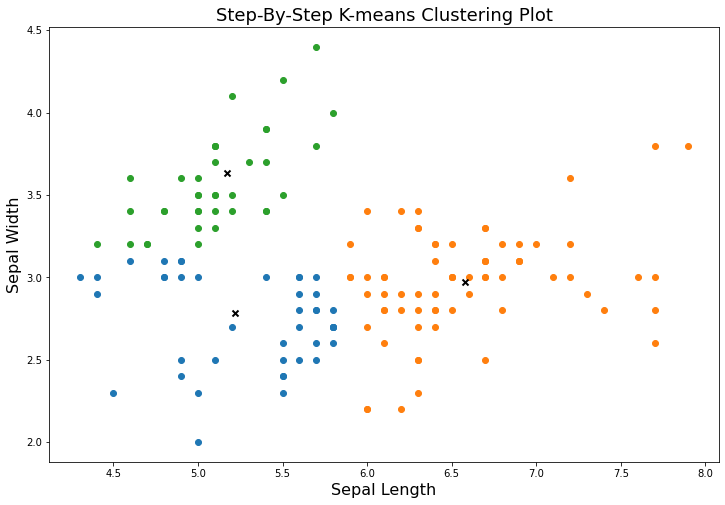

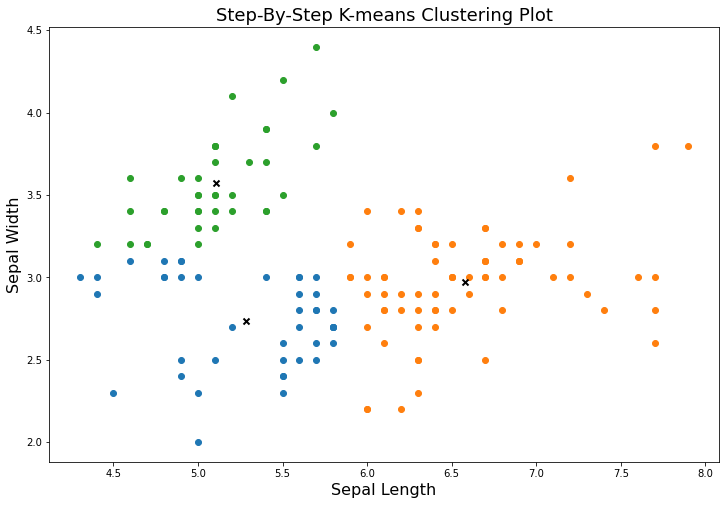

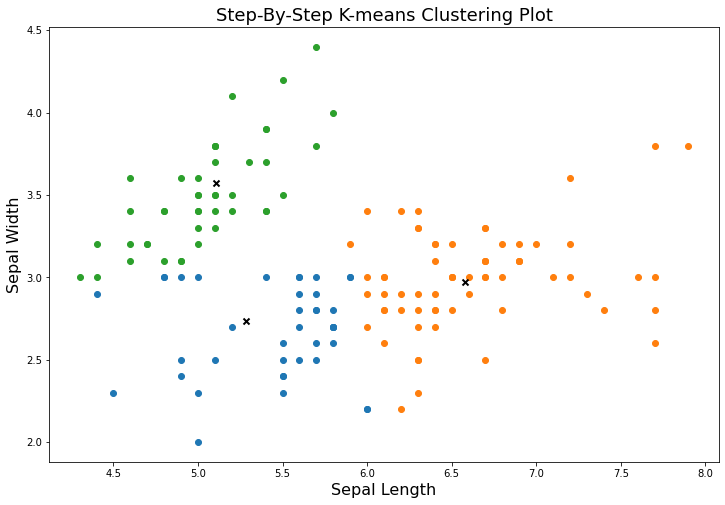

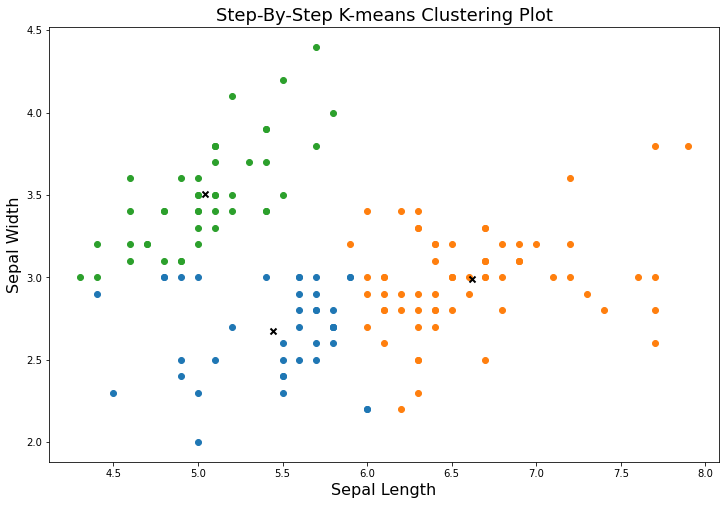

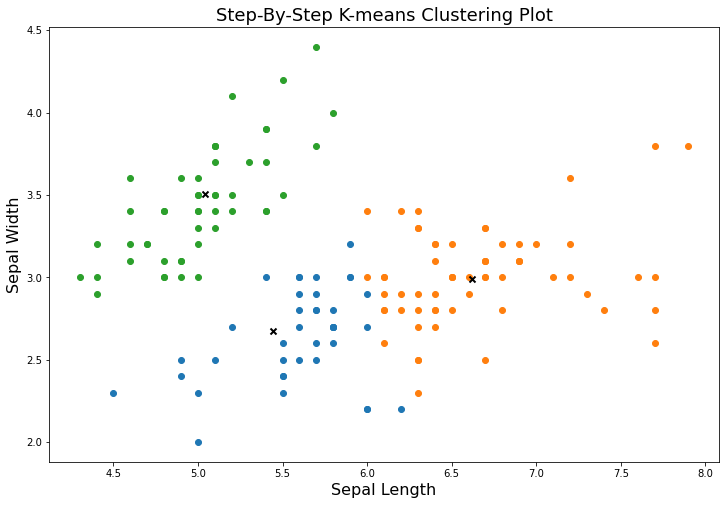

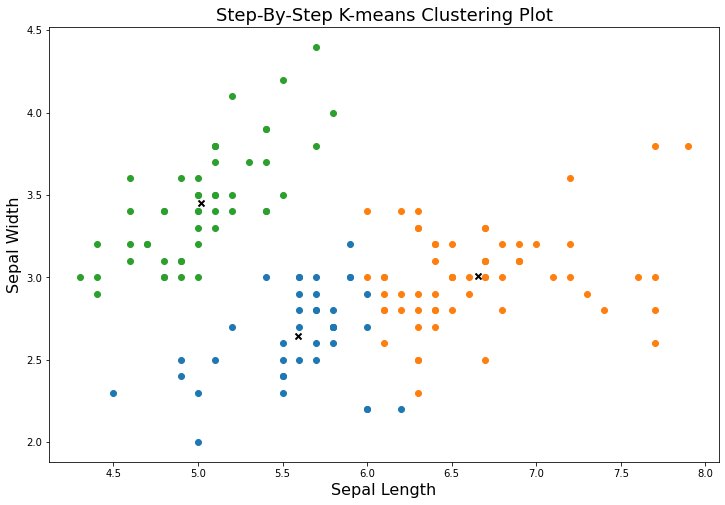

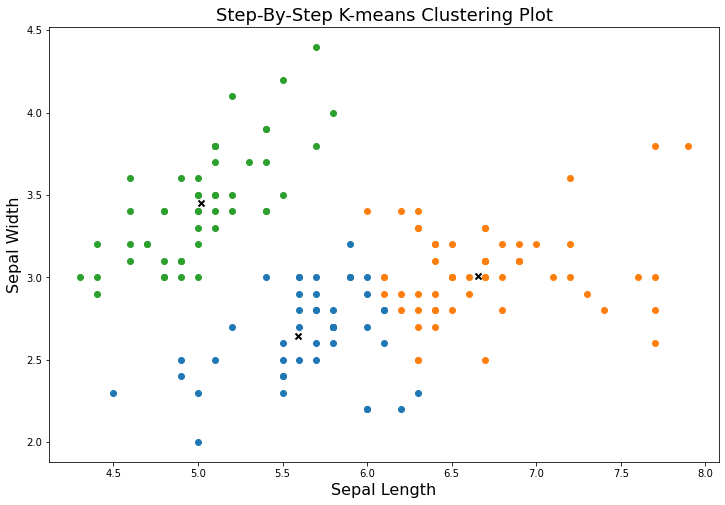

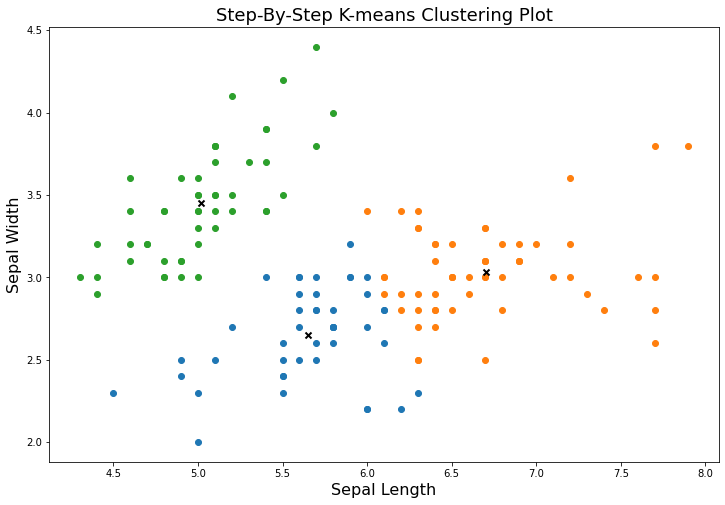

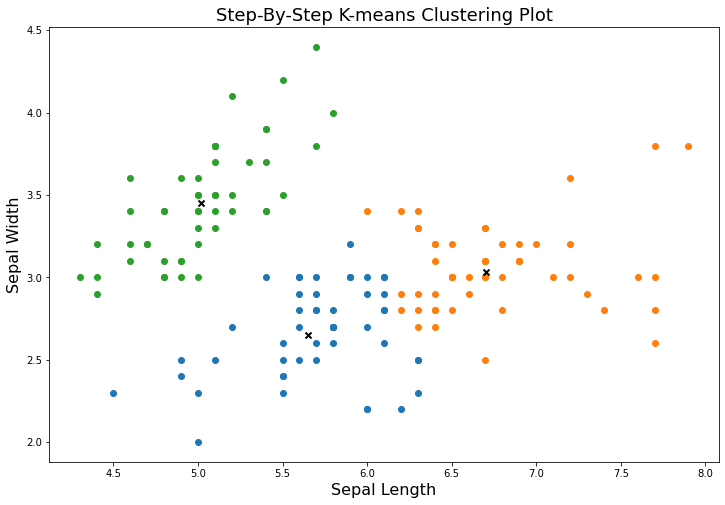

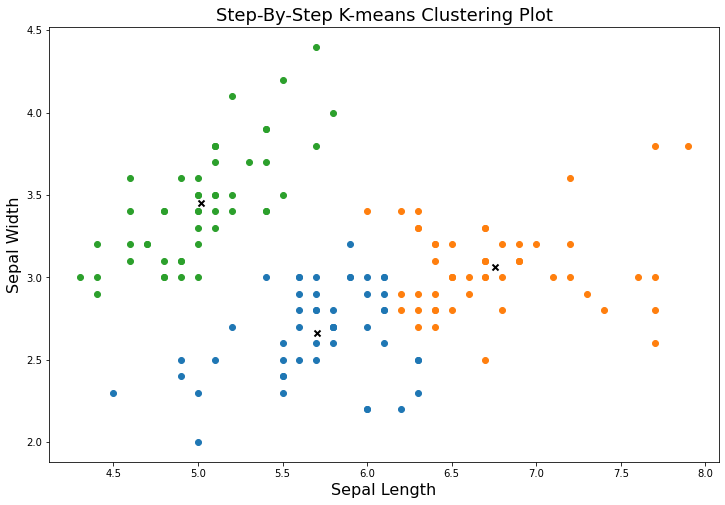

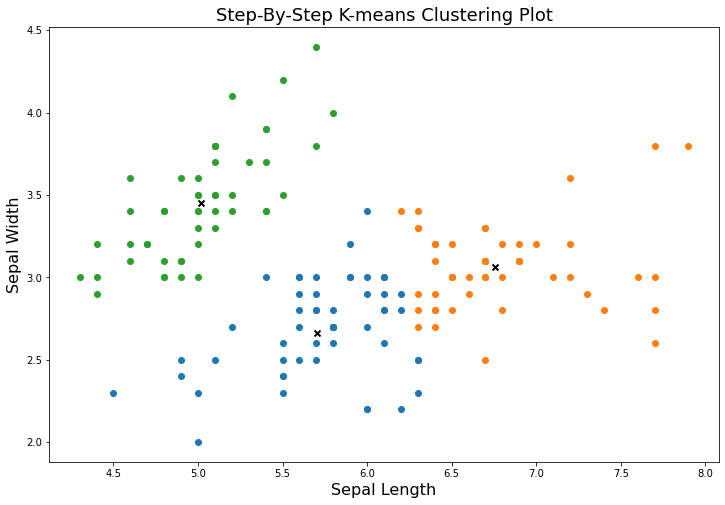

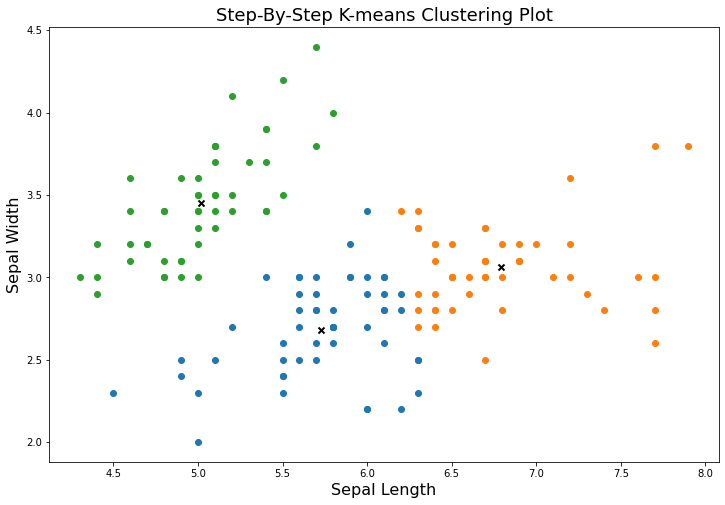

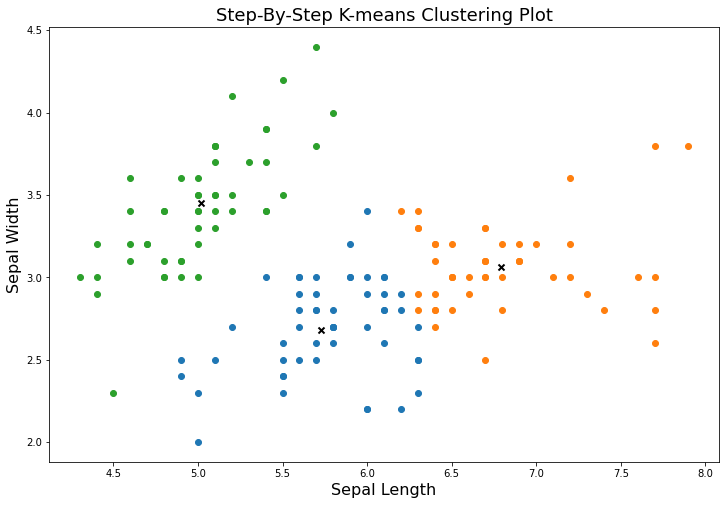

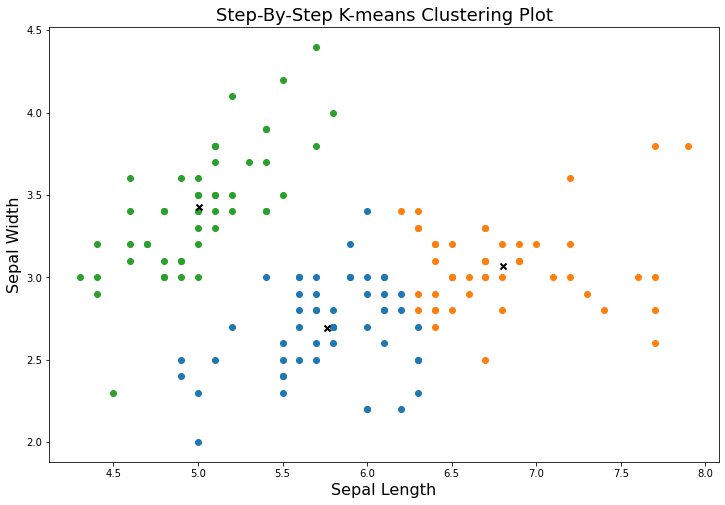

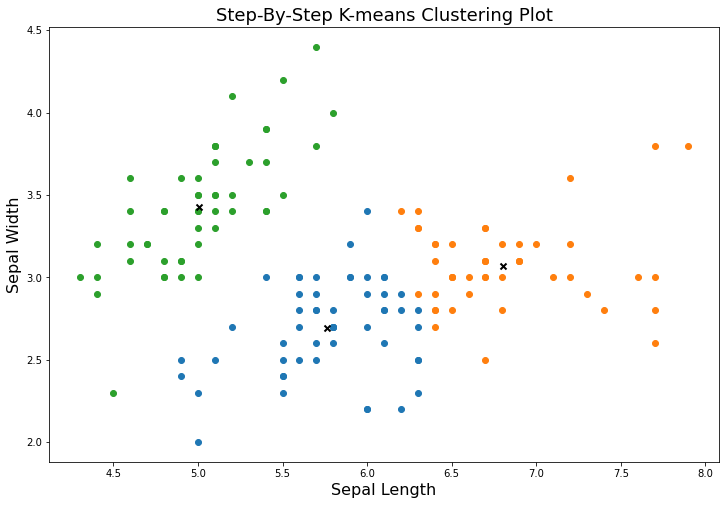

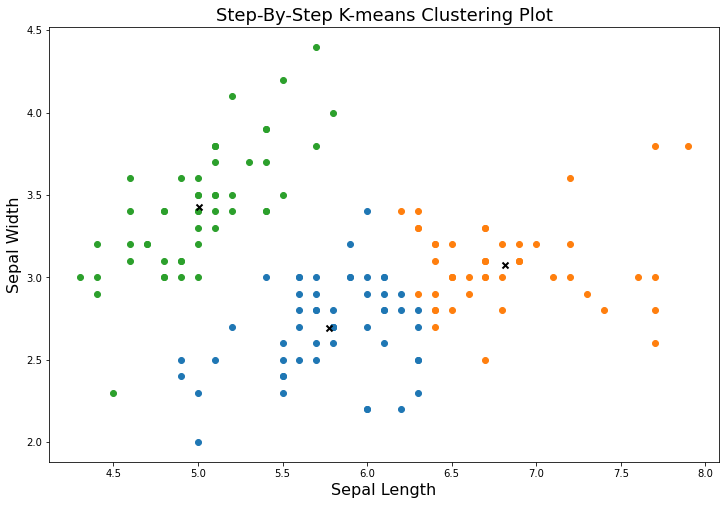

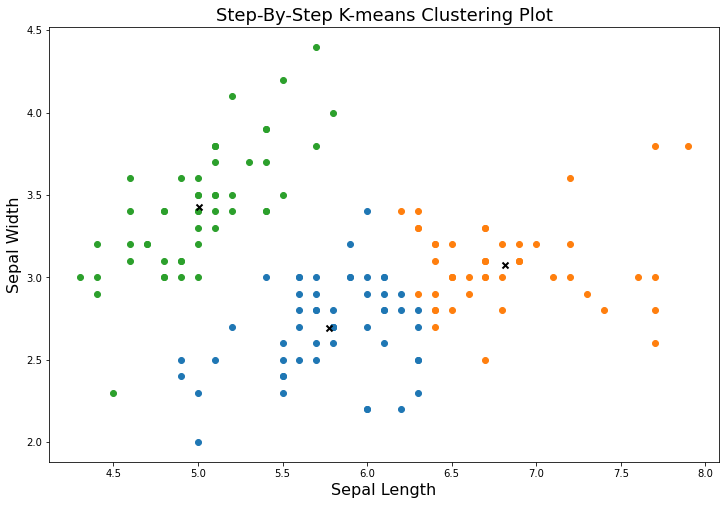

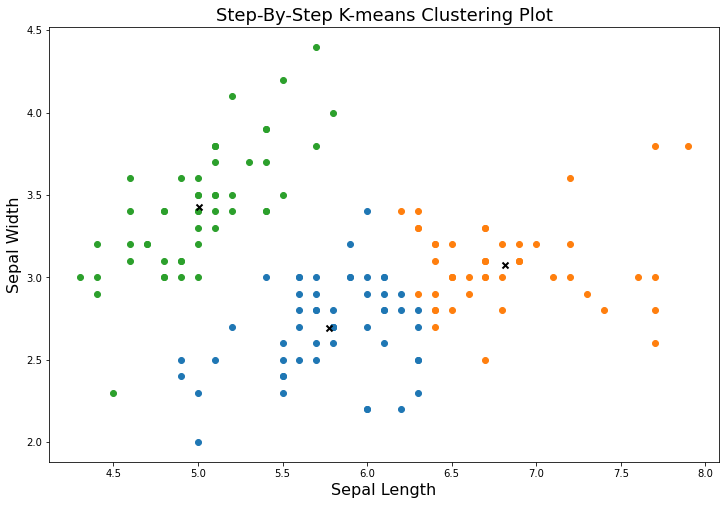

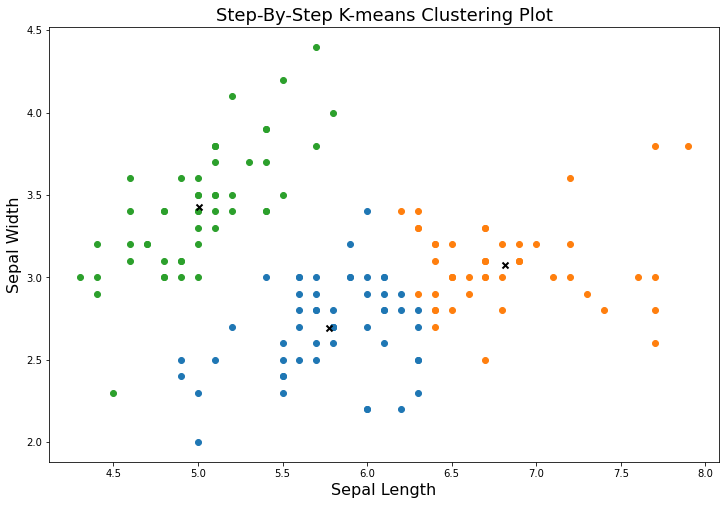

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
%matplotlib inline

iris = datasets.load_iris()
X = iris.data[:,:2]

k = Kmeans(K = 3, max_iterations=150, plot_steps = True)
predicted_clusters = k.predict_model(X)

k.plot2()

#### 4. (EXPERIMENTATION) Final Clustering plot results of implementing the K-means algorithm on the IRIS Species Dataset for K=4:

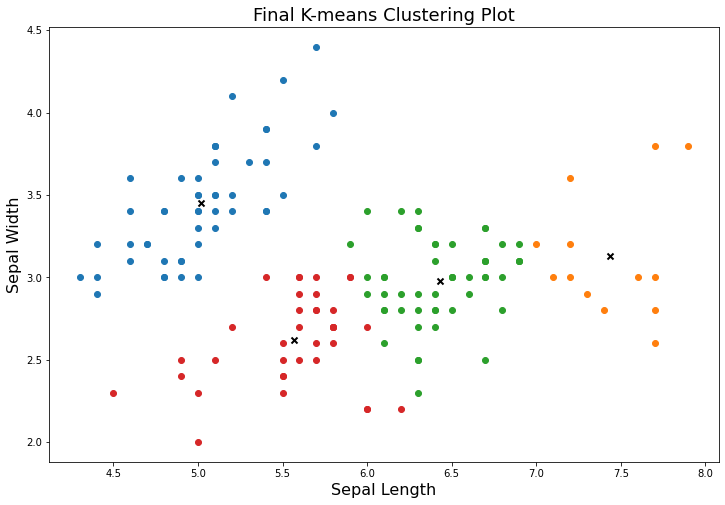

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
%matplotlib inline

iris = datasets.load_iris()
X = iris.data[:,:2]

k = Kmeans(K = 4, max_iterations=150, plot_steps = False)
predicted_clusters = k.predict_model(X)

k.plot1()

#### 5. Implementation of the Confusion Matrix for the K-means algorithm on the IRIS Species Dataset for K=3:
#### *Note*: I've also shown the accuracy score for my implementation of the K-means clustering algorithm below:

In [57]:
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
from sklearn import datasets
from sklearn.metrics import accuracy_score

%matplotlib inline


iris = datasets.load_iris()
X = iris.data[:,:2]

k = Kmeans(K = 3, max_iterations=150, plot_steps = False)
predicted_clusters = k.predict_model(X)
predicted_clusters = np.asarray(predicted_clusters,dtype = 'int')

accuracy_matrix = metrics.confusion_matrix(iris.target, predicted_clusters)
print(accuracy_matrix)

accuracy = accuracy_score(iris.target, predicted_clusters)
print(accuracy)

[[50  0  0]
 [ 0 38 12]
 [ 0 15 35]]
0.82


## 6. Conclusion
Based on the accuracy score, I can conclude that my implementation of the K-means algorithm is moderately efficient. To improve the efficiency I might have to run the algorithm for more iterations, or use a different K-value.